Importation des librairies

In [1]:
import pandas as pd
import string
import os
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image, ImageOps
from sklearn.cluster import KMeans
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Visualisation du csv

In [2]:
df = pd.read_csv('cleaned.csv', error_bad_lines=False)
df

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16576\758296984.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('cleaned.csv', error_bad_lines=False)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,"[""http://img5a.flixcart.com/image/sticker/h/4/...",False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,"[""http://img5a.flixcart.com/image/sticker/c/v/...",False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,"[""http://img6a.flixcart.com/image/sticker/w/c/...",False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
df.product_category_tree.tolist()

['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
 '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
 '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
 '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
 '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
 '["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]',
 '["Watches >> Wrist Watches >> C

Prétraitement des données textes pour obtenir un jeu de données exploitables

In [5]:
# Initialiser le lemmatiseur
lemmatizer = WordNetLemmatizer()

# Définir une fonction de lemmatisation pour une phrase
def lemmatize_sentence(sentence):
    # Tokeniser la phrase en mots
    tokens = nltk.word_tokenize(sentence)
    # Lemmatiser chaque mot
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    # Rejoindre les mots en une phrase
    lemmatized_sentence = " ".join(lemmatized_tokens)
    return lemmatized_sentence

# Définir une fonction pour déterminer la partie du discours d'un mot pour le lemmatiseur
def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [6]:
df_clean = df.assign(
    product_name_cleaned = df['product_name'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word.lower(), get_wordnet_pos(word)) for word in x.translate(str.maketrans('', '', string.punctuation)).split() if word not in {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'he', 'him', 'she', 'and', 'din', 'wrist', 'combo'}])),
    product_category_tree_cleaned = df['product_category_tree'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word.lower(), get_wordnet_pos(word)) for word in x.translate(str.maketrans('', '', string.punctuation)).split() if word not in {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'he', 'him', 'she', 'and', 'din', 'wrist', 'combo'}])),
    description_cleaned = df['description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word.lower(), get_wordnet_pos(word)) for word in x.translate(str.maketrans('', '', string.punctuation)).split() if word not in {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'he', 'him', 'she', 'and', 'din', 'wrist', 'combo'}]))
)

df_clean.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_name_cleaned,product_category_tree_cleaned,description_cleaned
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",elegance polyester multicolor abstract eyelet ...,home furnish curtain accessory curtain eleganc...,key feature of elegance polyester multicolor a...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",sathiyas cotton bath towel,baby care baby bath skin baby bath towel sathi...,specification of sathiyas cotton bath towel 3 ...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",eurospa cotton terry face towel set,baby care baby bath skin baby bath towel euros...,key feature of eurospa cotton terry face towel...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",santosh royal fashion cotton print king size d...,home furnish bed linen bedsheets santosh royal...,key feature of santosh royal fashion cotton pr...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",jaipur print cotton floral king size double be...,home furnish bed linen bedsheets jaipur print ...,key feature of jaipur print cotton floral king...


In [8]:
df_clean['product_category_tree_cleaned'].unique()[0:30]

array(['home furnish curtain accessory curtain elegance polyester multicolor abstract eyelet do',
       'baby care baby bath skin baby bath towel sathiyas baby bath towel sathiyas cotton bath towel 3 bath towel red y',
       'baby care baby bath skin baby bath towel eurospa baby bath towel eurospa cotton terry face towel set 20 piece fa',
       'home furnish bed linen bedsheets santosh royal fashion bedsheets santosh royal fashion cotton print king size',
       'home furnish bed linen bedsheets jaipur print bedsheets jaipur print cotton floral king size double bed',
       'watch wrist watch maserati time wrist watch',
       'watch wrist watch camerii wrist watch',
       'watch wrist watch t star wrist watch',
       'watch wrist watch alfajr wrist watch',
       'watch wrist watch tag heuer wrist watch',
       'watch wrist watch calibro wrist watch',
       'watch wrist watch cartier wrist watch',
       'watch wrist watch lois caron wrist watch',
       'watch wrist watch tita

In [16]:
# définir une fonction lambda pour extraire la sous-catégorie
extract_category = lambda x: x.split(">>")[0].strip(' "').strip(']["')

# appliquer la fonction à la colonne 'product_category_tree'
df_clean['category_label'] = df_clean['product_category_tree'].apply(extract_category)
df_clean.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_name_cleaned,product_category_tree_cleaned,description_cleaned,category_label
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",elegance polyester multicolor abstract eyelet ...,home furnish curtain accessory curtain eleganc...,key feature of elegance polyester multicolor a...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",sathiyas cotton bath towel,baby care baby bath skin baby bath towel sathi...,specification of sathiyas cotton bath towel 3 ...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",eurospa cotton terry face towel set,baby care baby bath skin baby bath towel euros...,key feature of eurospa cotton terry face towel...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",santosh royal fashion cotton print king size d...,home furnish bed linen bedsheets santosh royal...,key feature of santosh royal fashion cotton pr...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",jaipur print cotton floral king size double be...,home furnish bed linen bedsheets jaipur print ...,key feature of jaipur print cotton floral king...,Home Furnishing


In [17]:
category_count = df_clean.groupby(['category_label'])['uniq_id'].nunique().sort_values(ascending=False)
print(category_count)

category_label
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: uniq_id, dtype: int64


In [24]:
from sklearn.preprocessing import normalize

# Initialiser le vectoriseur pour le bag-of-words
vectorizer = CountVectorizer(min_df=5, stop_words='english')

# Appliquer le vectoriseur aux descriptions nettoyées
bag_of_words = vectorizer.fit_transform(df_clean['description_cleaned'])

# Normaliser les fréquences des mots dans chaque document
bag_of_words_normalized = normalize(bag_of_words)

# Transformer en DataFrame
bag_of_words_df_clean = pd.DataFrame(bag_of_words_normalized.toarray(), columns=vectorizer.get_feature_names())

bag_of_words_df_clean.head()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,11,12,121,1299,13,14,141,...,woman,wood,wooden,work,world,wrap,year,yellow,yes,youre
0,0.0,0.00000,0.053300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0533,0.0,0.00000,0.00000,0.000000,0.0
1,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084215,0.0,0.0,0.0,0.0000,0.0,0.00000,0.16843,0.084215,0.0
2,0.0,0.04714,0.094281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.047140,0.0,0.0,0.0,0.0000,0.0,0.04714,0.00000,0.000000,0.0
3,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0000,0.0,0.00000,0.00000,0.052632,0.0
4,0.0,0.00000,0.087039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0000,0.0,0.00000,0.00000,0.043519,0.0


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range=(1,2))

# Appliquer le vectorizer sur la colonne 'description_cleaned'
tfidf_description = tfidf_vectorizer.fit_transform(df_clean['description_cleaned'])

# Transformer les résultats en dataframe
tfidf_description = pd.DataFrame(tfidf_description.toarray(), columns=tfidf_vectorizer.get_feature_names())

tfidf_description.head()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,00 from,10,10 cm,100,100 cotton,100 percent,100 pure,11,12,...,your moment,your own,your room,your skin,your style,youre,youre sure,yourself,yourself our,yourself to
0,0.0,0.0,0.000000,0.0,0.037837,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.055516,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.044886,0.0,0.078934,0.046295,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.056746,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.066434,0.038964,0.0,0.0,0.0,0.0,...,0.0,0.0,0.048736,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


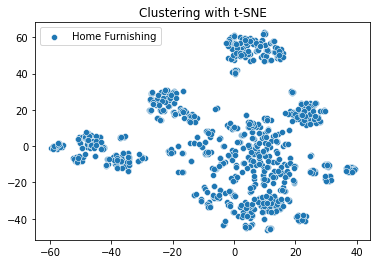

In [47]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Convertir les étiquettes de catégorie en valeurs numériques
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_clean['category_label'])

# Réduire les dimensions à l'aide de t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(tfidf_description)

# Clustering avec k-means
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(tfidf_description)

# Afficher la visualisation des clusters avec t-SNE
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], data=df_clean, palette='bright')
plt.title('Clustering with t-SNE')
category_names = df_clean['category_label'].unique()
plt.legend(labels=category_names)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

# Diviser l'ensemble de données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(bag_of_words_df_clean, df_clean['category_label'], test_size=0.2, random_state=42)

# Entraîner un modèle de classification
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8523809523809524


In [17]:
# Création d'une instance de CountVectorizer avec les options désirées
count_vectorizer = CountVectorizer(min_df=2, max_df=0.9, lowercase=True, stop_words='english')

# Création d'une instance de TfidfVectorizer avec les options désirées
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.9, lowercase=True, stop_words='english')

# Utilisation du CountVectorizer pour construire la matrice de comptage
count_matrix = count_vectorizer.fit_transform(df['description'])

# Utilisation du TfidfVectorizer pour construire la matrice Tf-idf
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

# Affichage des dimensions des matrices
print("Dimensions de la matrice de comptage :", count_matrix.shape)
print("Dimensions de la matrice Tf-idf :", tfidf_matrix.shape)

Dimensions de la matrice de comptage : (1050, 2193)
Dimensions de la matrice Tf-idf : (1050, 2193)


In [18]:
from collections import Counter

# Concaténation de toutes les chaînes de caractères dans la colonne 'product_category_tree'
text = ' '.join(df['product_category_tree'].tolist())

# Tokenisation du texte en mots
words = text.split()

# Comptage des occurrences de chaque mot
word_counts = Counter(words)

common_words = [w[0] for w in word_counts.most_common(7)]

# Affichage des 7 mots les plus fréquents
print(word_counts.most_common(7))

[('watch', 458), ('baby', 434), ('care', 365), ('home', 313), ('wrist', 298), ('kitchen', 210), ('combo', 209)]


In [9]:
# Créer un dictionnaire pour mapper chaque mot-clé à un indice numérique
word_to_idx = {w: i for i, w in enumerate(common_words)}

# Appliquer le mapping aux données
X = count_matrix[:, [vectorizer.vocabulary_.get(w) for w in common_words]]

# Créer un modèle de KMeans avec 7 clusters
kmeans = KMeans(n_clusters=7, random_state=0)
labels = kmeans.fit_predict(count_matrix)

# Appliquer le clustering sur les données
kmeans.fit(X)

# Assigner chaque produit à un cluster
df['cluster'] = kmeans.predict(X)

NameError: name 'vectorizer' is not defined

In [135]:
from sklearn import cluster, metrics
import time

# Determination number of clusters
temps1=time.time()

k = 7
#k=40
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, random_state=0)
kmeans.fit(common_word_matrix)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  7
Création de 7 clusters de descripteurs ...
temps de traitement kmeans :             1.78 secondes


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


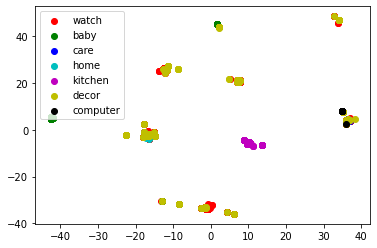

In [138]:
# Construire une matrice de comptage pour les 7 mots les plus communs
count_matrix = np.zeros((len(df), 7))
for i, word in enumerate(common_words):
    count_matrix[:,i] = df['product_category_tree'].str.count(word)

# Réduction de dimensionnalité t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(count_matrix)

# Tracer les points en 2D avec des couleurs différentes pour chaque cluster
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(k):
    plt.scatter(X_tsne[labels == i, 0], X_tsne[labels == i, 1], c=colors[i], label=common_words[i])
plt.legend()
plt.show()

In [142]:
from gensim.models import Word2Vec

# Construction d'une liste de phrases
sentences = [sentence.split() for sentence in df['description'].tolist()]

# Entraînement du modèle Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [143]:
word_embeddings = model.wv

common_words = ['watch', 'baby', 'care', 'home', 'kitchen', 'decor', 'computer']

common_word_embeddings = []
for word in common_words:
    if word in word_embeddings:
        common_word_embeddings.append(word_embeddings[word])

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


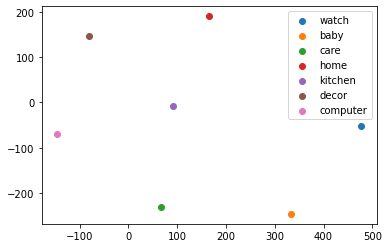

In [146]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

common_word_embeddings = np.array(common_word_embeddings)

tsne = TSNE(n_components=2, perplexity=5, n_iter=2000, init='random', random_state=6)
common_word_embeddings_2d = tsne.fit_transform(common_word_embeddings)

# Afficher les points de chaque cluster avec une couleur différente
for i, word in enumerate(common_words):
    plt.scatter(common_word_embeddings_2d[i, 0], common_word_embeddings_2d[i, 1], label=word)

plt.legend()
plt.show()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


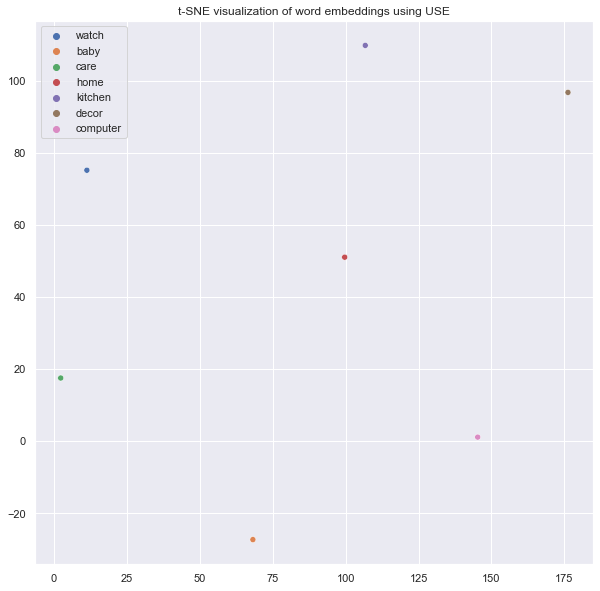

In [149]:
import tensorflow_hub as hub
import tensorflow as tf

# Charger le module USE
use_module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_module = hub.load(use_module_url)

# Définir les mots-clés à représenter
common_words = ['watch', 'baby', 'care', 'home', 'kitchen', 'decor', 'computer']

# Obtenir les embeddings des mots-clés avec USE
common_word_embeddings = use_module(common_words).numpy()

# Réduire la dimensionnalité à 2 avec t-SNE
tsne = TSNE(n_components=2, perplexity=5, n_iter=2000, init='random', random_state=6)
common_word_embeddings_2d = tsne.fit_transform(common_word_embeddings)

# Visualiser les embeddings avec t-SNE
sns.set()
plt.figure(figsize=(10, 10))
sns.scatterplot(x=common_word_embeddings_2d[:,0], y=common_word_embeddings_2d[:,1], hue=common_words, legend='full')
plt.title("t-SNE visualization of word embeddings using USE")
plt.show()

In [162]:
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA

# Charger le modèle BERT
model = AutoModel.from_pretrained('bert-base-uncased')

# Obtenir les embeddings pour chaque mot
common_word_embeddings = []
for word in common_words:
    inputs = tokenizer.encode(word, return_tensors='pt')
    outputs = model(inputs)[0]
    embeddings = outputs.squeeze().detach().numpy()
    common_word_embeddings.append(embeddings)

# Appliquer PCA pour réduire la dimensionnalité à deux
pca = PCA(n_components=2)
common_word_embeddings_2d = pca.fit_transform(common_word_embeddings)

# Appliquer t-SNE
tsne = TSNE(n_components=2, perplexity=5, n_iter=5000, init='random', random_state=6)
common_word_embeddings_2d = tsne.fit_transform(common_word_embeddings_2d)

# Afficher les points de chaque cluster avec une couleur différente
for i, word in enumerate(common_words):
    plt.scatter(common_word_embeddings_2d[i, 0], common_word_embeddings_2d[i, 1], label=word)

plt.legend()
plt.show()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 17>:17                                                                            │
│                                                                                                  │
│   14                                                                                             │
│   15 # Appliquer PCA pour réduire la dimensionnalité à deux                                      │
│   16 pca = PCA(n_components=2)                                                                   │
│ ❱ 17 common_word_embeddings_2d = pca.fit_transform(common_word_embeddings)                       │
│   18                                                                                             │
│   19 # Appliquer t-SNE                                                                           │
│   20 tsne = TSNE(n_components=2, perplexity=5, n_iter=5000, init='random', random_state=6)       │
│                                                                                                  │
│ C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:433 in            │
│ fit_transform                                                                                    │
│                                                                                                  │
│   430 │   │   This method returns a Fortran-ordered array. To convert it to a                    │
│   431 │   │   C-ordered array, use 'np.ascontiguousarray'.                                       │
│   432 │   │   """                                                                                │
│ ❱ 433 │   │   U, S, Vt = self._fit(X)                                                            │
│   434 │   │   U = U[:, : self.n_components_]                                                     │
│   435 │   │                                                                                      │
│   436 │   │   if self.whiten:                                                                    │
│                                                                                                  │
│ C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:456 in _fit       │
│                                                                                                  │
│   453 │   │   │   │   "TruncatedSVD for a possible alternative."                                 │
│   454 │   │   │   )                                                                              │
│   455 │   │                                                                                      │
│ ❱ 456 │   │   X = self._validate_data(                                                           │
│   457 │   │   │   X, dtype=[np.float64, np.float32], ensure_2d=True, copy=self.copy              │
│   458 │   │   )                                                                                  │
│   459                                                                                            │
│                                                                                                  │
│ C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\base.py:577 in _validate_data           │
│                                                                                                  │
│    574 │   │   if no_val_X and no_val_y:                                                         │
│    575 │   │   │   raise ValueError("Validation should be done on X, y or both.")                │
│    576 │   │   elif not no_val_X and no_val_y:                                                   │
│ ❱  577 │   │   │   X = check_array(X, input_name="X", **check_params)                            │
│    578 │   │   │   out = X                                                                       │
│    579 │   │   elif no_val_X and not no_val_y:             

In [52]:
# Tokeniser le texte et le transformer en une liste de listes de mots
sentences = [doc.split() for doc in df['description']]
 
# Entraîner un modèle Word2Vec
model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [61]:
!pip install --upgrade tensorflow-text
import tensorflow_hub as hub
import tensorflow_text

# Charger le modèle USE
module_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual/3"
model = hub.load(module_url)

# Obtenir le vecteur embedding d'une phrase
sentence = "This is an example sentence."
embeddings = model([sentence])

ImportError: DLL load failed while importing tflite_registrar: La procédure spécifiée est introuvable.

Prétraitement des données images

In [173]:
from os import listdir

image_folder = 'images/'
list_image = [file for file in listdir(image_folder)]
print(len(list_image))

3150


In [170]:
import cv2

for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):  # filtrer les fichiers jpg uniquement
        filepath = os.path.join(image_folder, filename)
        img = cv2.imread(filepath)

        # augmentation de contraste
        img_contrast = cv2.convertScaleAbs(img, alpha=1.2, beta=10)

        # égalisation de l'histogramme
        gray_img = cv2.cvtColor(img_contrast, cv2.COLOR_BGR2GRAY)
        eq_img = cv2.equalizeHist(gray_img)
        
        # Filtrage du bruit avec un filtre gaussien
        blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
        
        # Floutage de l'image pour atténuer les détails
        blur_img2 = cv2.blur(eq_img, (10, 10))

        # sauvegarde de l'image traitée
        result_path = os.path.join(image_folder, f'{filename[:-4]}_processed.jpg')
        cv2.imwrite(result_path, eq_img)

In [171]:
def extract_features(image_folder, descriptor='ORB', num_clusters=50):
    """
    return: matrice des descriptions en histogramme de features
    """
    features = []
    labels = []
    if descriptor == 'ORB':
        extractor = cv2.ORB_create()
    elif descriptor == 'SIFT':
        extractor = cv2.SIFT_create()
    elif descriptor == 'SURF':
        extractor = cv2.SURF_create()
    else:
        raise ValueError('Descripteur invalide')

    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):
            filepath = os.path.join(image_folder, filename)
            img = cv2.imread(filepath)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Extraction des descripteurs
            keypoints, descriptors = extractor.detectAndCompute(gray_img, None)
            features.append(descriptors)
            labels.append(filename.split('_')[0])

    # Regroupement des descripteurs en un dictionnaire de clusters
    features = np.vstack(features)
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(features)
    vocabulary = kmeans.cluster_centers_

    # Quantification des descripteurs en histogrammes de features
    features_hist = []
    for descriptors in features:
        dist = np.linalg.norm(vocabulary - descriptors, axis=1)
        hist, _ = np.histogram(np.argmin(dist), bins=num_clusters)
        features_hist.append(hist)

    return np.vstack(features_hist), labels

In [ ]:
# Générer des descripteurs "bag-of-images" à partir des features extraits
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
boi = np.zeros((3,))
for label in kmeans.labels_:
    boi[label] += 1

In [ ]:
boi